# WeatherPy
----

####
Findings:
- It seems that the highest temperatures are not in the ecuator (latitud=0) but sumewhere arround latitude=20°
- Regarding the other values (Humidity, Cloudiness and Wind Speed), it seems  that there is no asociation beteewn them and latitud.
- The data seems to be left skewed (see histogram and box plot). The data seems to be concentrated between 0° and 45° latitudes. 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:
### Url elements
url0= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
### Data Frame where request are going to be stored
weather=pd.DataFrame()

##### Loop of request:
print("-----------------------------\nBegining Data Retrival\n-----------------------------")
for ct in range(len(cities)):
    city=cities[ct]
    url=url0+"appid="+api_key+"&units="+units+"&q="+city
    wresponse=requests.get(url)
    if wresponse.status_code != 200:
        print('City not found. Skipping...')
    elif wresponse.status_code == 200:
        print(f'Processing Record {ct} of Set {len(cities)} : {cities[ct]}')
        wjson=wresponse.json()
        weather=weather.append({"City":city,"Country":wjson['sys']['country'],"Latitud":wjson['coord']['lat'],
                                "Longitud":wjson['coord']['lon'], "Max Temperature":wjson['main']['temp_max'],
                                "Humidity":wjson['main']['humidity'], "Cloudiness":wjson['clouds']['all'],
                                "Wind Speed":wjson['wind']['speed']}, ignore_index=True)
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

-----------------------------
Begining Data Retrival
-----------------------------
Processing Record 0 of Set 617 : tobermory
Processing Record 1 of Set 617 : rikitea
Processing Record 2 of Set 617 : easton
Processing Record 3 of Set 617 : hermanus
Processing Record 4 of Set 617 : lagoa
City not found. Skipping...
Processing Record 6 of Set 617 : aleksandrovskoye
Processing Record 7 of Set 617 : tasiilaq
Processing Record 8 of Set 617 : nanakuli
Processing Record 9 of Set 617 : bredasdorp
Processing Record 10 of Set 617 : punta arenas
Processing Record 11 of Set 617 : georgetown
Processing Record 12 of Set 617 : pisco
Processing Record 13 of Set 617 : eslov
Processing Record 14 of Set 617 : ushuaia
Processing Record 15 of Set 617 : benjamin hill
Processing Record 16 of Set 617 : vaini
Processing Record 17 of Set 617 : san cristobal
City not found. Skipping...
Processing Record 19 of Set 617 : tucuman
Processing Record 20 of Set 617 : alofi
Processing Record 21 of Set 617 : mataura
Proc

Processing Record 193 of Set 617 : vila franca do campo
Processing Record 194 of Set 617 : termiz
Processing Record 195 of Set 617 : zeya
Processing Record 196 of Set 617 : shimoda
Processing Record 197 of Set 617 : ixtapa
Processing Record 198 of Set 617 : mount gambier
Processing Record 199 of Set 617 : kamaishi
Processing Record 200 of Set 617 : pasni
Processing Record 201 of Set 617 : lufilufi
Processing Record 202 of Set 617 : vostok
Processing Record 203 of Set 617 : avarua
Processing Record 204 of Set 617 : iqaluit
City not found. Skipping...
Processing Record 206 of Set 617 : novosheshminsk
Processing Record 207 of Set 617 : la libertad
Processing Record 208 of Set 617 : deputatskiy
Processing Record 209 of Set 617 : port lincoln
Processing Record 210 of Set 617 : esperance
Processing Record 211 of Set 617 : mahon
Processing Record 212 of Set 617 : anadyr
Processing Record 213 of Set 617 : jamestown
Processing Record 214 of Set 617 : yanam
Processing Record 215 of Set 617 : sha

Processing Record 387 of Set 617 : mtsamboro
Processing Record 388 of Set 617 : saint-prosper
Processing Record 389 of Set 617 : khromtau
City not found. Skipping...
Processing Record 391 of Set 617 : tutayev
Processing Record 392 of Set 617 : mus
Processing Record 393 of Set 617 : sepuka
Processing Record 394 of Set 617 : acapulco
Processing Record 395 of Set 617 : spencer
Processing Record 396 of Set 617 : maceio
Processing Record 397 of Set 617 : cabo san lucas
Processing Record 398 of Set 617 : coari
Processing Record 399 of Set 617 : manono
Processing Record 400 of Set 617 : martapura
Processing Record 401 of Set 617 : wajima
Processing Record 402 of Set 617 : anakapalle
Processing Record 403 of Set 617 : kalabo
Processing Record 404 of Set 617 : rantepao
City not found. Skipping...
Processing Record 406 of Set 617 : mehndawal
Processing Record 407 of Set 617 : tura
Processing Record 408 of Set 617 : la ronge
Processing Record 409 of Set 617 : maragogi
Processing Record 410 of Set

Processing Record 580 of Set 617 : ituiutaba
Processing Record 581 of Set 617 : rockport
City not found. Skipping...
Processing Record 583 of Set 617 : bowen
Processing Record 584 of Set 617 : nieves
Processing Record 585 of Set 617 : constantine
Processing Record 586 of Set 617 : gayeri
Processing Record 587 of Set 617 : socuellamos
Processing Record 588 of Set 617 : lavrentiya
Processing Record 589 of Set 617 : rawson
City not found. Skipping...
Processing Record 591 of Set 617 : vanavara
Processing Record 592 of Set 617 : savannakhet
Processing Record 593 of Set 617 : pacific grove
Processing Record 594 of Set 617 : nanuque
Processing Record 595 of Set 617 : dallas
Processing Record 596 of Set 617 : magan
Processing Record 597 of Set 617 : sidney
Processing Record 598 of Set 617 : nagato
Processing Record 599 of Set 617 : tigre
Processing Record 600 of Set 617 : cangzhou
Processing Record 601 of Set 617 : vestmannaeyjar
Processing Record 602 of Set 617 : emerald
Processing Record 60

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather.to_csv(output_data_file)

In [33]:
weather.head(10)

,City,Cloudiness,Country,Humidity,Latitud,Longitud,Max Temperature,Wind Speed
0,tobermory,0.0,CA,91.0,45.25,-81.67,52.00,10.42
1,rikitea,56.0,PF,81.0,-23.12,-134.97,74.03,11.43
2,easton,1.0,US,73.0,38.77,-76.08,78.01,3.36
3,hermanus,0.0,ZA,97.0,-34.42,19.24,50.00,1.01
4,lagoa,75.0,PT,94.0,37.14,-8.45,69.01,5.82
5,aleksandrovskoye,0.0,RU,44.0,56.74,85.39,75.20,8.95
6,tasiilaq,14.0,GL,86.0,65.61,-37.64,41.00,4.70
7,nanakuli,75.0,US,65.0,21.39,-158.15,82.40,10.29
8,bredasdorp,1.0,ZA,97.0,-34.53,20.04,48.99,1.01
9,punta arenas,90.0,CL,100.0,-53.16,-70.91,39.20,10.29


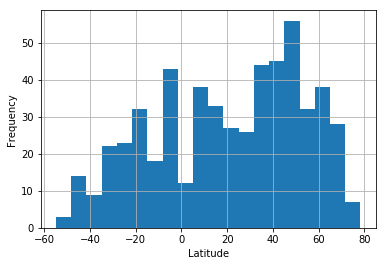

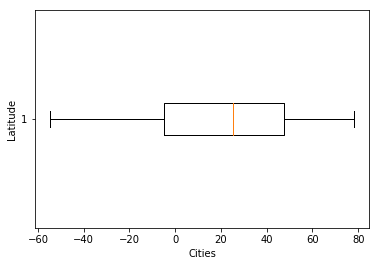

In [45]:
###Distribution of cities latitudes
weather["Latitud"].hist(bins=20)
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(weather["Latitud"], vert=False)
plt.xlabel("Cities")
plt.ylabel("Latitude")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

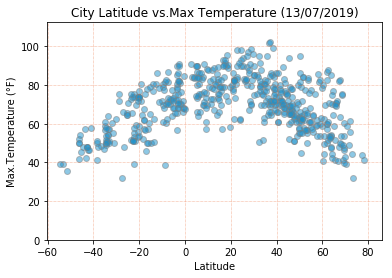

In [35]:
plt.scatter(weather.Latitud, weather['Max Temperature'], marker="o", facecolors="#1d92cc",
            edgecolors="grey", alpha=0.50)
plt.ylim(0,weather["Max Temperature"].max()*1.1)
plt.xlim(weather["Latitud"].min()*1.1,weather["Latitud"].max()*1.1)
plt.title("City Latitude vs.Max Temperature (13/07/2019)")
plt.ylabel("Max.Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(linestyle=":", color="#eb642f", linewidth=.5)

plt.savefig("Lat_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

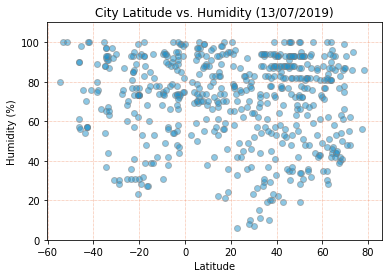

In [36]:
plt.scatter(weather.Latitud, weather['Humidity'], marker="o", facecolors="#1d92cc",
            edgecolors="grey", alpha=0.50)
plt.ylim(0,weather["Humidity"].max()*1.1)
plt.xlim(weather["Latitud"].min()*1.1,weather["Latitud"].max()*1.1)
plt.title("City Latitude vs. Humidity (13/07/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(linestyle=":", color="#eb642f", linewidth=.5)

plt.savefig("Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

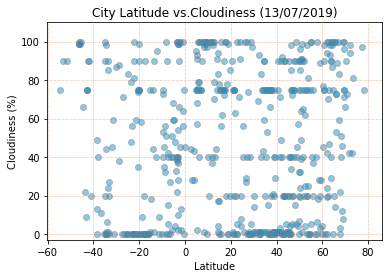

In [37]:
plt.scatter(weather.Latitud, weather['Cloudiness'], marker="o", facecolors="#1d92cc",
            edgecolors="grey", alpha=0.50)
plt.ylim(-3,weather["Cloudiness"].max()*1.1)
plt.xlim(weather["Latitud"].min()*1.1,weather["Latitud"].max()*1.1)
plt.title("City Latitude vs.Cloudiness (13/07/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(linestyle=":", color="#eb642f", linewidth=.5)

plt.savefig("Lat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

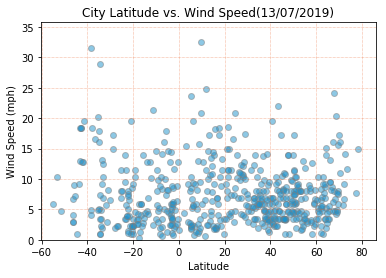

In [38]:
plt.scatter(weather.Latitud, weather['Wind Speed'], marker="o", facecolors="#1d92cc",
            edgecolors="grey", alpha=0.50)
plt.ylim(0,weather["Wind Speed"].max()*1.1)
plt.xlim(weather["Latitud"].min()*1.1,weather["Latitud"].max()*1.1)
plt.title("City Latitude vs. Wind Speed(13/07/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(linestyle=":", color="#eb642f", linewidth=.5)

plt.savefig("Lat_WindSpeed.png")
plt.show()